Algoritmo para imagen 3: 

1) Se elimina pasto y lineas blancas

2) Se eliminan espacios completos

3) filtro hsv, obtiene blancos

4) arbol sobre el resultado de 2, obtiene jugadores quitando arbritro y algunos blancos,

5) luego resto el resultado de 3, obtienendo rojos

código de ventana

In [3]:


#import the libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#n#ame_image="offside1.png"
#name_image="offside2.png"
name_image="off side 3.png"

(-0.5, 2609.5, 1339.5, -0.5)

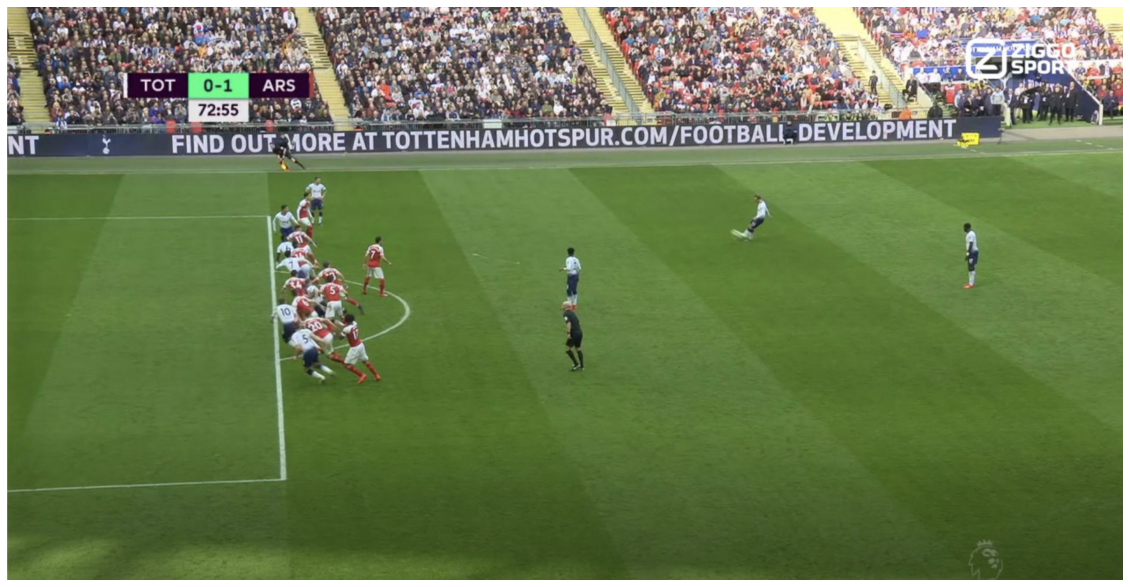

In [11]:
img = cv.cvtColor(cv.imread(name_image), cv.COLOR_BGR2RGB)
#hsv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots( figsize=(20,20)) 
#axarr.imshow(img)
axarr.imshow(img)
axarr.axis("off")

In [66]:
img.shape

(1468, 2610, 3)

# PASTO

(-0.5, 2609.5, 1339.5, -0.5)

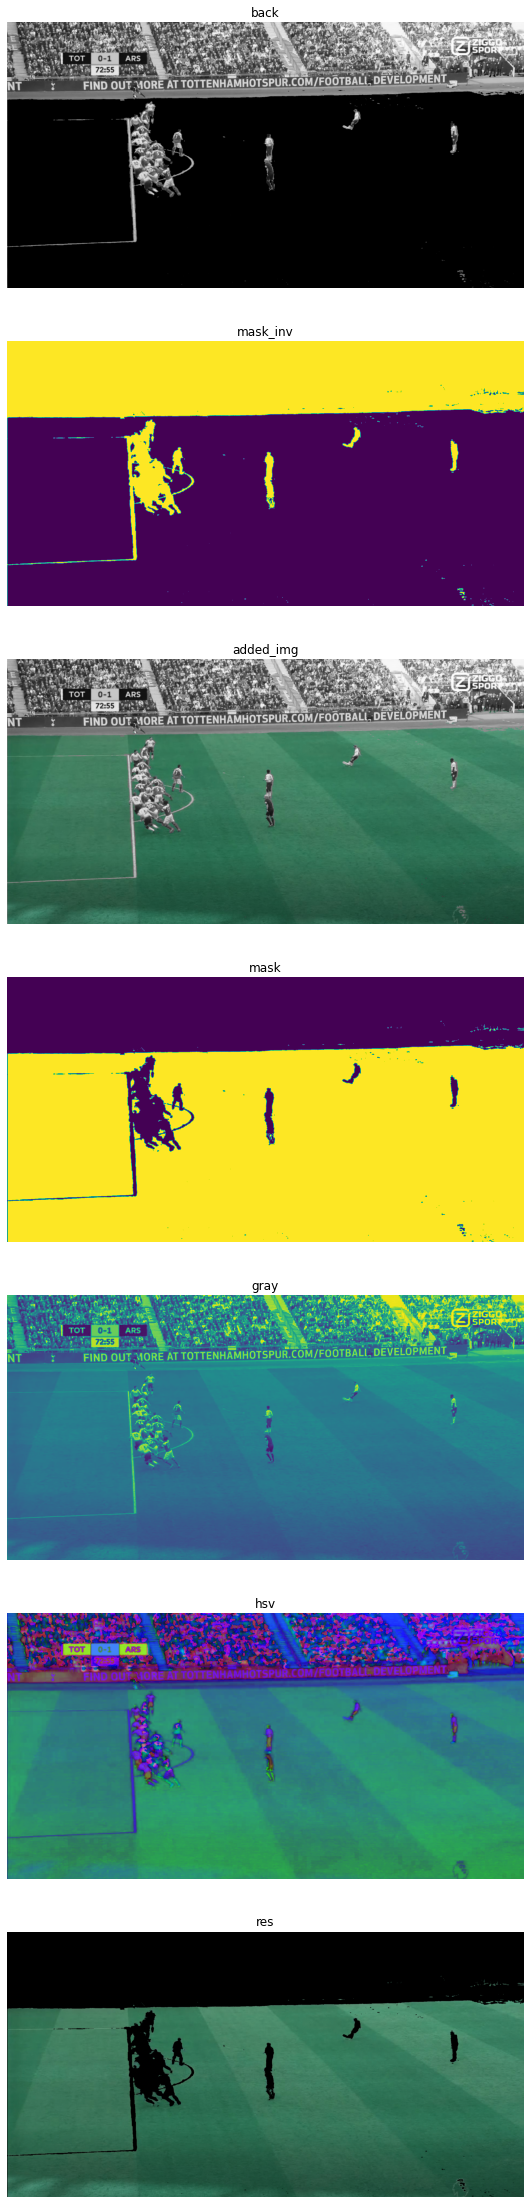

In [13]:


#import the libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#read the image
img = cv.imread(name_image)
#set the lower and upper bounds for the green hue
lower_green = np.array([37,92,87])#1
upper_green = np.array([50,255,255])#1
#2
#(hMin = 33 , sMin = 88, vMin = 104), (hMax = 44 , sMax = 148, vMax = 155)

#lower_green = np.array([33,88,104])#2
#upper_green = np.array([44,148,155])#2

#(hMin = 36 , sMin = 91, vMin = 67), (hMax = 47 , sMax = 172, vMax = 155)

lower_green = np.array([36,91,67])#3
upper_green = np.array([47,172,155])#3

#convert the BGR image to HSV colour space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


#create a mask using the bounds set
mask = cv.inRange(hsv, lower_green, upper_green)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)



    #subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(7,1,  figsize=(20,40)) 
axarr[0].imshow(background)
axarr[0].title.set_text("back")
axarr[0].axis("off")

axarr[1].imshow(mask_inv)
axarr[1].title.set_text("mask_inv")
axarr[1].axis("off")

axarr[2].imshow(added_img)
axarr[2].title.set_text("added_img")
axarr[2].axis("off")

axarr[3].imshow(mask)
axarr[3].title.set_text("mask")
axarr[3].axis("off")

axarr[4].imshow(gray)
axarr[4].title.set_text("gray")
axarr[4].axis("off")

axarr[5].imshow(hsv)
axarr[5].title.set_text("hsv")
axarr[5].axis("off")

axarr[6].imshow(res)
axarr[6].title.set_text("res")
axarr[6].axis("off")

# quitando pasto

In [14]:
img = cv.cvtColor(cv.imread(name_image), cv.COLOR_BGR2RGB)

img.shape

(1340, 2610, 3)

In [56]:
res.shape

(1468, 2610, 3)

(-0.5, 2609.5, 1339.5, -0.5)

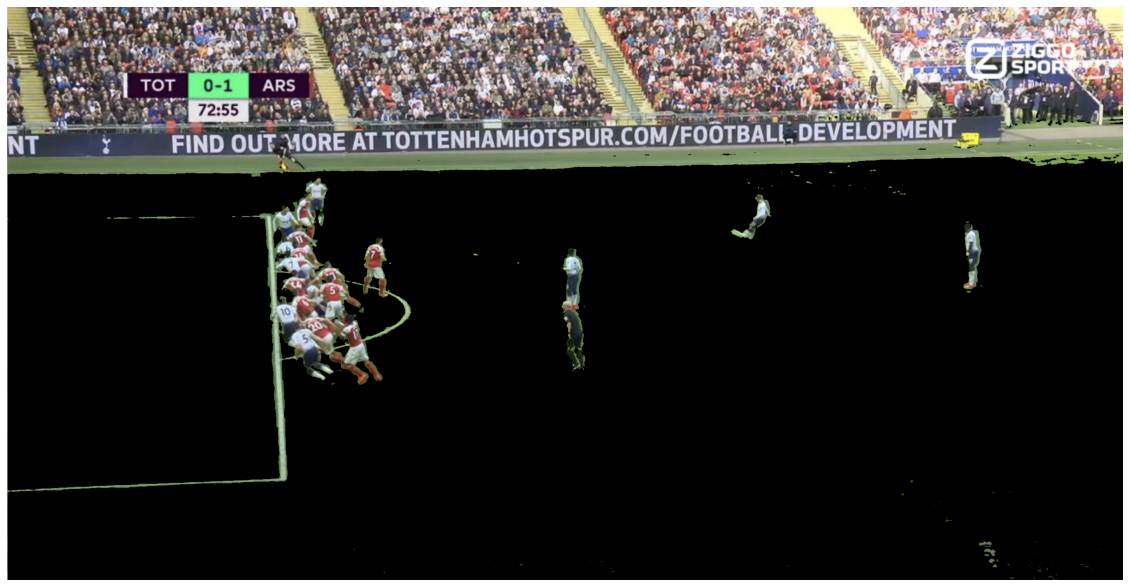

In [15]:
masked_x = np.ma.array(img, mask=(res!=0)) 
sin_pasto=masked_x.filled(0)
f, axarr = plt.subplots( figsize=(20,20)) 
#axarr.imshow(img-res)
axarr.imshow(sin_pasto)
#axarr.title.set_text("Filtro de Césped: off side 1")
axarr.axis("off")

# lineas del campo

(-0.5, 2609.5, 1339.5, -0.5)

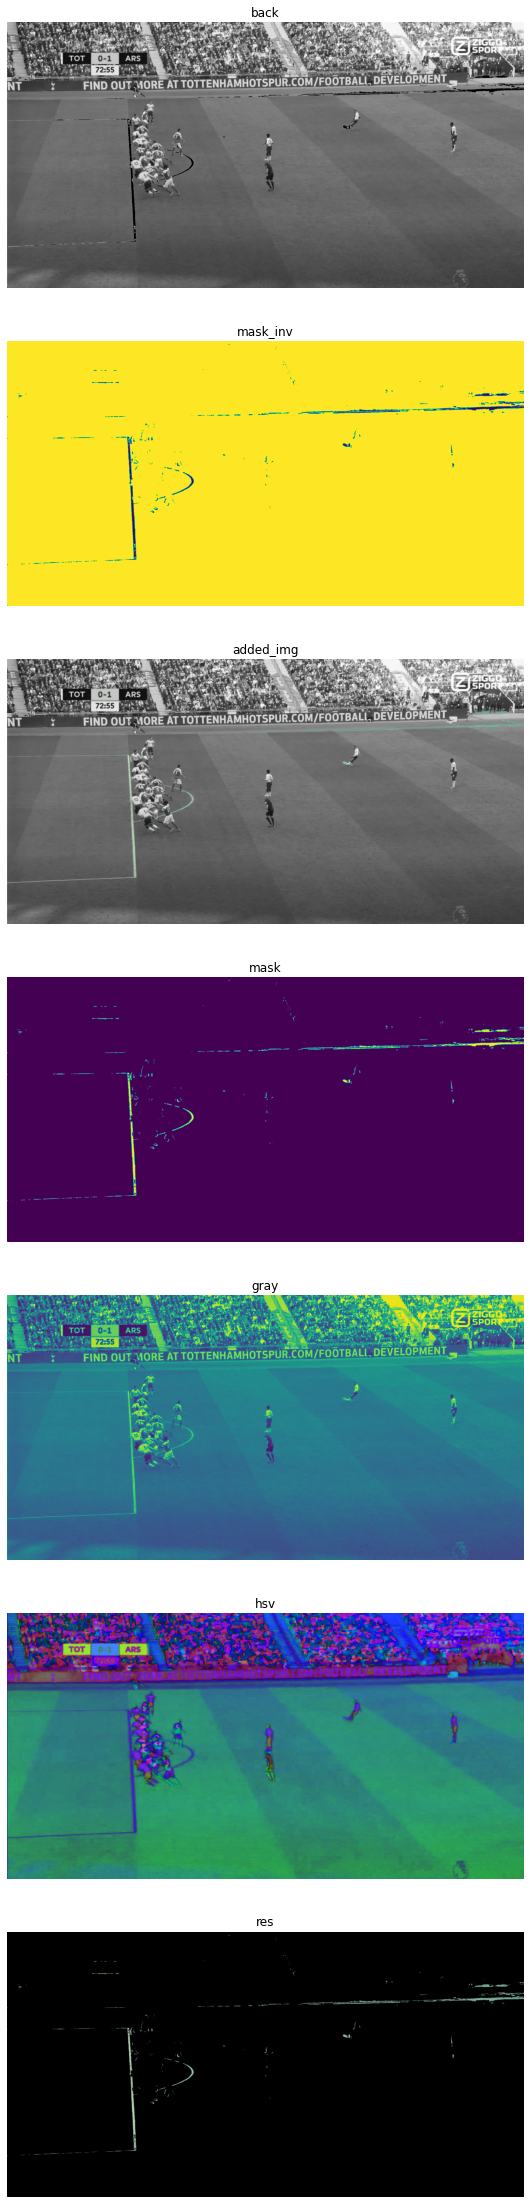

In [16]:
lower_white = np.array([44,23,138])#1
upper_white = np.array([101,107,229])#1

#set the lower and upper bounds for the green hue
lower_white = np.array([37,10,151])#2
upper_white = np.array([56,97,231])#2



#(hMin = 41 , sMin = 31, vMin = 156), (hMax = 70 , sMax = 105, vMax = 222)
lower_white = np.array([41,31,156])#3
upper_white = np.array([70,105,222])#3
#import the libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
#convert the BGR image to HSV colour space
img = cv.imread(name_image)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


#create a mask using the bounds set
mask = cv.inRange(hsv, lower_white, upper_white)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)



    #subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(7,1,  figsize=(20,40)) 
axarr[0].imshow(background)
axarr[0].title.set_text("back")
axarr[0].axis("off")

axarr[1].imshow(mask_inv)
axarr[1].title.set_text("mask_inv")
axarr[1].axis("off")

axarr[2].imshow(added_img)
axarr[2].title.set_text("added_img")
axarr[2].axis("off")

axarr[3].imshow(mask)
axarr[3].title.set_text("mask")
axarr[3].axis("off")

axarr[4].imshow(gray)
axarr[4].title.set_text("gray")
axarr[4].axis("off")

axarr[5].imshow(hsv)
axarr[5].title.set_text("hsv")
axarr[5].axis("off")

axarr[6].imshow(res)
axarr[6].title.set_text("res")
axarr[6].axis("off")

# quitando lineas

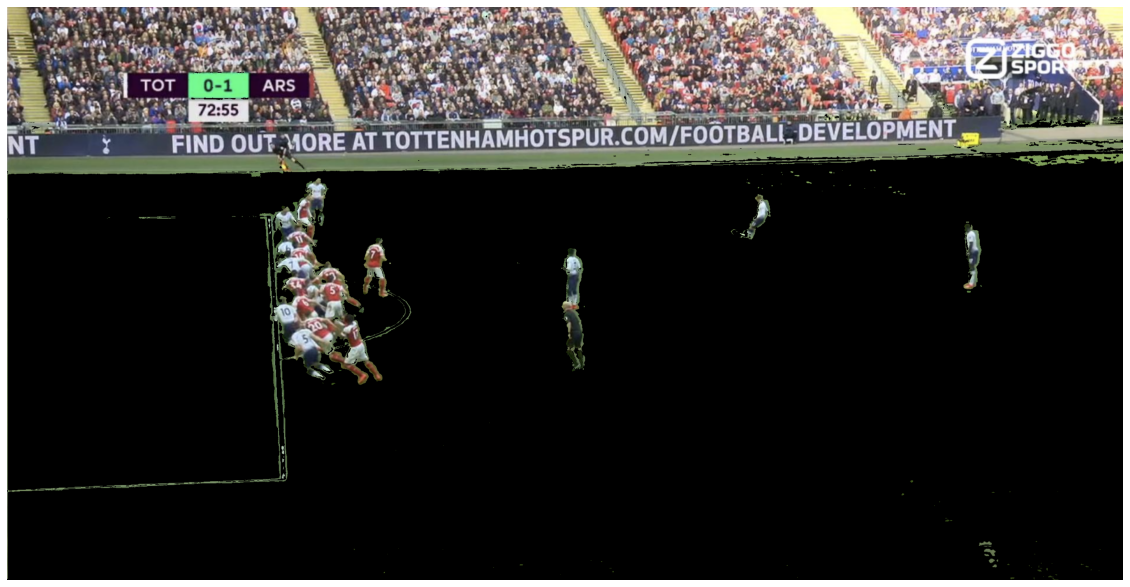

In [17]:

masked_y = np.ma.array(sin_pasto, mask=(res!=0)) 
f, axarr = plt.subplots( figsize=(20,20)) 
#axarr.imshow(img-res)
axarr.imshow(masked_y.filled(0))
#axarr.title.set_text("Filtro de Césped: off side 1")
axarr.axis("off")
masked_y= masked_y.filled(0)

In [152]:
#1
for i in range(masked_y.shape[0]):
    if np.sum(masked_y[i,:])<np.sum(masked_y[:,100]):
        print(i)
        break

334


In [57]:
#3
for i in range(masked_y.shape[0]):
    if np.sum(masked_y[i,:])<np.sum(masked_y[500,:]):
        print(i)
        break

391


In [92]:
#2
for i in range(masked_y.shape[0]):
    if np.sum(masked_y[i,:])<np.sum(masked_y[0,:]):
        print(i)
        break
        
for i in range(masked_y.shape[1]):
    if np.sum(masked_y[:,i])<np.sum(masked_y[:,800]):
        print(i)
        break


310
498


(-0.5, 2609.5, 1339.5, -0.5)

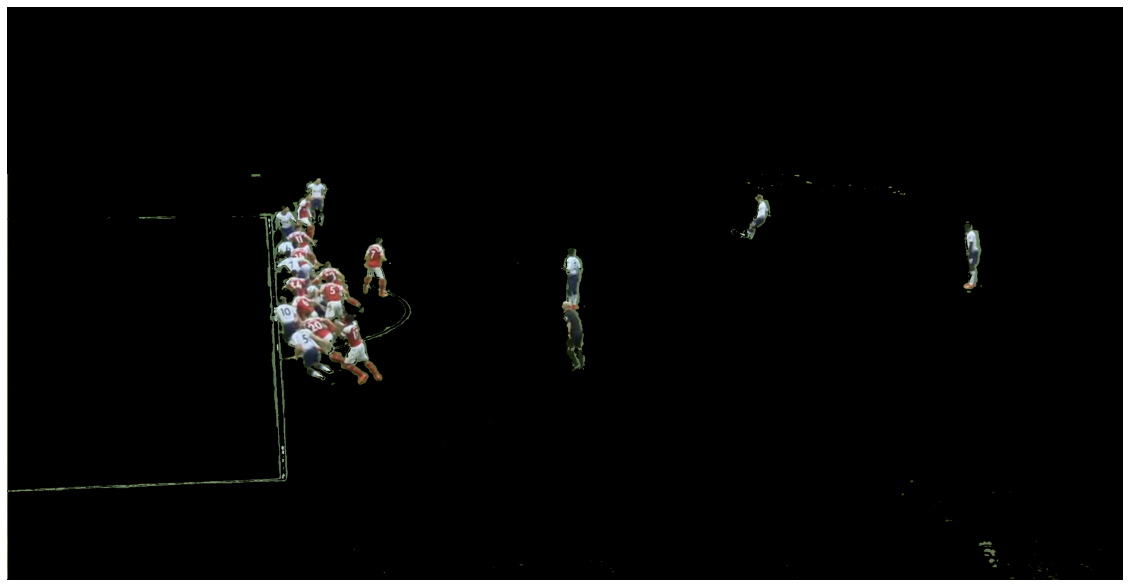

In [18]:
masked_= masked_y
#masked_[:334,:]=0 #1
masked_[:391,:]=0 #3
#masked_[:314,:]=0 #2
#masked_[:,:810]=0 #2
f, axarr = plt.subplots( figsize=(20,20)) 
#axarr.imshow(img-res)
axarr.imshow(masked_)
#axarr.title.set_text("Filtro de Césped: off side 1")
axarr.axis("off")

# otsu method

https://medium.com/swlh/image-processing-with-python-image-segmentation-using-thresholding-methods-423ecdaf8ab4

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
chico= masked_
chico_gray = rgb2gray(chico)
for th, ax in zip(th_values, axis.flatten()):
    
    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized, cmap="gray")
    ax.set_title('$Threshold = %.2f$' % th)


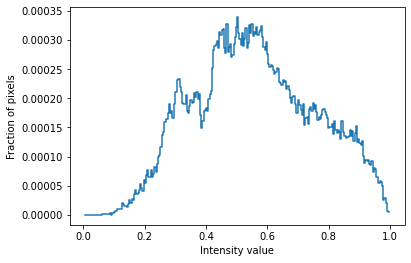

In [15]:
freq, bins = histogram(chico_gray)
plt.step(bins[1:], freq[1:]*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

In [80]:
np.median(chico_gray[600:800,600:800])

0.43745333333333336

In [20]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])


chico= masked_
chico_gray = rgb2gray(chico)
plt.figure(figsize=(20,15))
thresh = threshold_otsu(chico_gray)
chico_otsu  = ((chico_gray < 0.99) & (chico_gray > 0.75)) | ((chico_gray < 0.2) & (chico_gray > 0.1)) #3
#chico_otsu  = (chico_gray < thresh) #2
#chico_otsu  = ((chico_gray < 0.99) & (chico_gray > 0.75)) | ((chico_gray < 0.2) & (chico_gray > 0.1)) #2
#ax[0].imshow(chico_otsu, cmap="gray")
filtered = masked_image(chico, chico_otsu)
plt.imshow(filtered)

filtrar(probar cotas) para el hue 

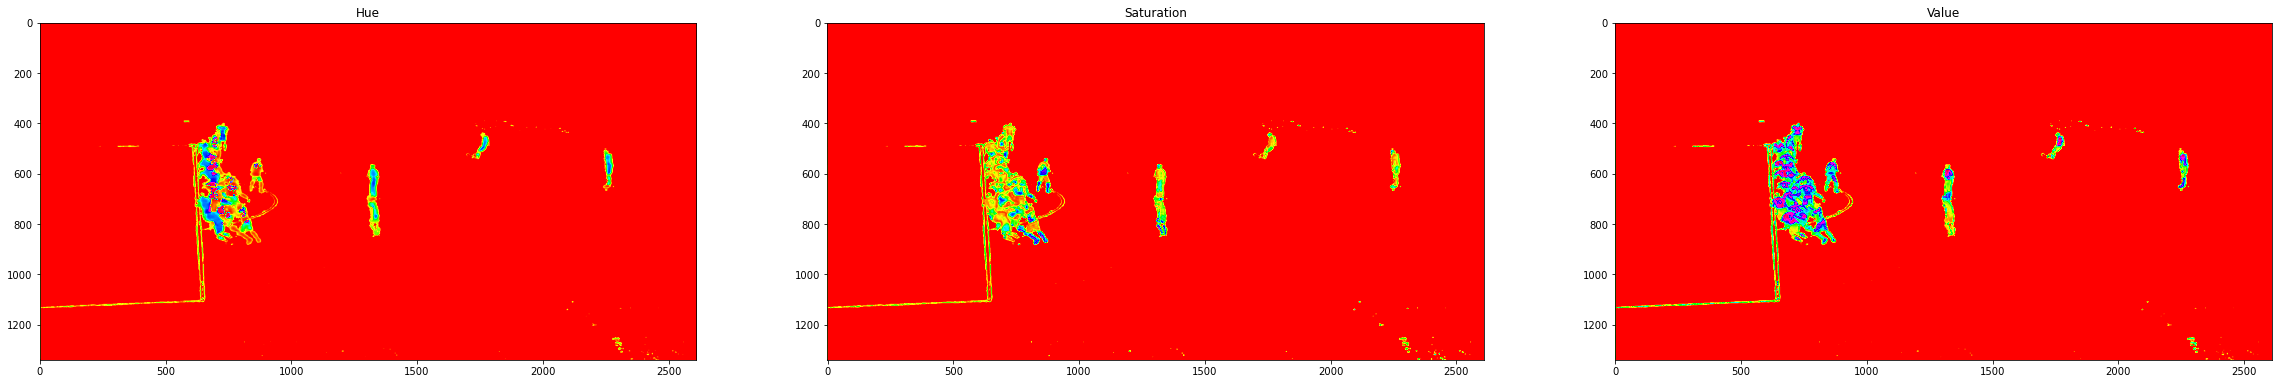

In [21]:
chico= masked_
chico_hsv = rgb2hsv(chico)
fig, ax = plt.subplots(1, 3, figsize=(40,30))
ax[0].imshow(chico_hsv[:,:,0], cmap="hsv")
ax[0].set_title("Hue")
ax[1].imshow(chico_hsv[:,:,1], cmap="hsv")
ax[1].set_title("Saturation")
ax[2].imshow(chico_hsv[:,:,2], cmap="hsv")
ax[2].set_title("Value");

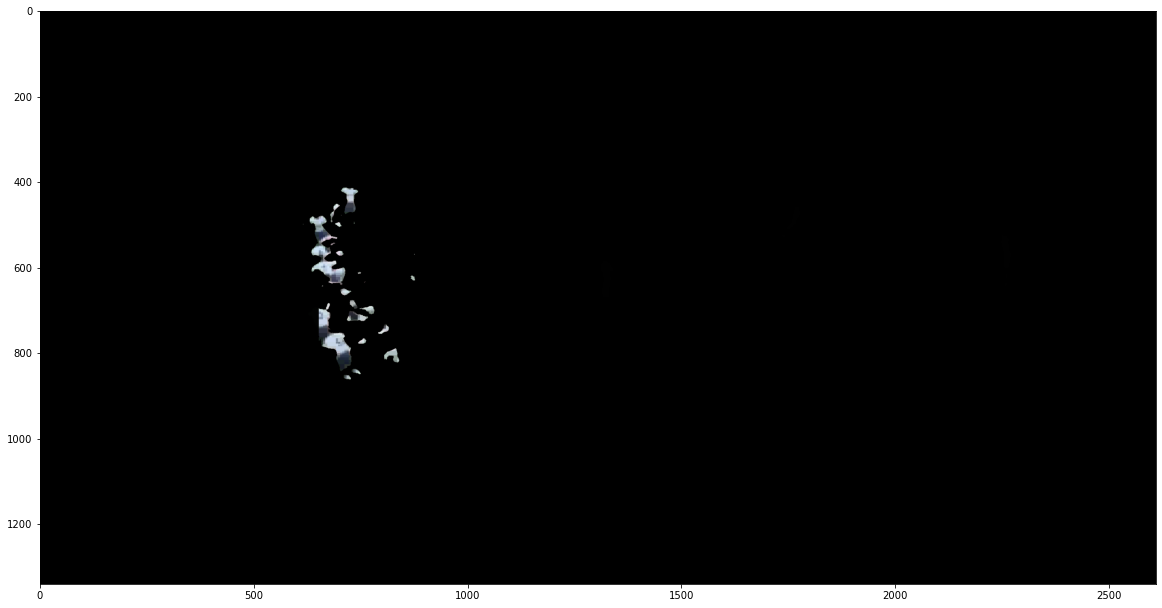

In [31]:
chico_gray_hsv= chico_hsv[:,:,0]
plt.figure(figsize=(20,15))
chico_otsu  = ((chico_gray_hsv < 0.9) & (chico_gray_hsv > 0.4)) #3y1| ((chico_gray_hsv < 0.15) & (chico_gray_hsv > 0.1))
#chico_otsu  = ((chico_gray_hsv < 0.9) & (chico_gray_hsv > 0.13))#2
#ax[0].imshow(chico_otsu, cmap="gray")
blancos = masked_image(chico, chico_otsu)
plt.imshow(blancos)

# rojos

In [23]:
# Open cv library
import cv2

# matplotlib for displaying the images 
from matplotlib import pyplot as plt
import matplotlib.patches as patches

import random
import math
import numpy as np

img = masked_

def printI(img):
    fig= plt.figure(figsize=(20, 20))
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    
    
def printI2(i1, i2):
    fig= plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(cv2.cvtColor(i1, cv2.COLOR_BGR2RGB))
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))
    
class Node():
    def __init__(self, x0, y0, w, h):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.children = []

    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def get_points(self):
        return self.points
    
    def get_points(self, img):
        return img[self.x0:self.x0 + self.get_width(), self.y0:self.y0+self.get_height()]
    
    def get_error(self, img):
        pixels = self.get_points(img)
        b_avg = np.mean(pixels[:,:,0])
        b_mse = np.square(np.subtract(pixels[:,:,0], b_avg)).mean()
    
        g_avg = np.mean(pixels[:,:,1])
        g_mse = np.square(np.subtract(pixels[:,:,1], g_avg)).mean()
        
        r_avg = np.mean(pixels[:,:,2])
        r_mse = np.square(np.subtract(pixels[:,:,2], r_avg)).mean()
        
        e = r_mse * 0.2989 + g_mse * 0.5870 + b_mse * 0.1140
        
        return (e * img.shape[0]* img.shape[1])/90000000
class QTree():
    def __init__(self, stdThreshold, minPixelSize, img):
        self.threshold = stdThreshold
        self.min_size = minPixelSize
        self.minPixelSize = minPixelSize
        self.img = img
        self.root = Node(0, 0, img.shape[0], img.shape[1])

    def get_points(self):
        return img[self.root.x0:self.root.x0 + self.root.get_width(), self.root.y0:self.root.y0+self.root.get_height()]
    
    def subdivide(self):
        recursive_subdivide(self.root, self.threshold, self.minPixelSize, self.img)
    
    def graph_tree(self):
        fig = plt.figure(figsize=(10, 10))
        plt.title("Quadtree")
        c = find_children(self.root)
        print("Number of segments: %d" %len(c))
        for n in c:
            plt.gcf().gca().add_patch(patches.Rectangle((n.y0, n.x0), n.height, n.width, fill=False))
        plt.gcf().gca().set_xlim(0,img.shape[1])
        plt.gcf().gca().set_ylim(img.shape[0], 0)
        plt.axis('equal')
        plt.show()
        return

    def render_img(self, thickness = 1, color = (0,0,255)):
        imgc = self.img.copy()
        c = find_children(self.root)
        for n in c:
            pixels = n.get_points(self.img)
            # grb
            gAvg = math.floor(np.mean(pixels[:,:,0]))
            rAvg = math.floor(np.mean(pixels[:,:,1]))
            bAvg = math.floor(np.mean(pixels[:,:,2]))

            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0+n.get_height(), 0] = gAvg
            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0+n.get_height(), 1] = rAvg
            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0+n.get_height(), 2] = bAvg

        if thickness > 0:
            for n in c:
                # Draw a rectangle
                imgc = cv2.rectangle(imgc, (n.y0, n.x0), (n.y0+n.get_height(), n.x0+n.get_width()), color, thickness)
        return imgc
    
def recursive_subdivide(node, k, minPixelSize, img):

    if node.get_error(img)<=k:
        return
    w_1 = int(math.floor(node.width/2))
    w_2 = int(math.ceil(node.width/2))
    h_1 = int(math.floor(node.height/2))
    h_2 = int(math.ceil(node.height/2))


    if w_1 <= minPixelSize or h_1 <= minPixelSize:
        return
    x1 = Node(node.x0, node.y0, w_1, h_1) # top left
    recursive_subdivide(x1, k, minPixelSize, img)

    x2 = Node(node.x0, node.y0+h_1, w_1, h_2) # btm left
    recursive_subdivide(x2, k, minPixelSize, img)

    x3 = Node(node.x0 + w_1, node.y0, w_2, h_1)# top right
    recursive_subdivide(x3, k, minPixelSize, img)

    x4 = Node(node.x0+w_1, node.y0+h_1, w_2, h_2) # btm right
    recursive_subdivide(x4, k, minPixelSize, img)

    node.children = [x1, x2, x3, x4]
   

def find_children(node):
   if not node.children:
       return [node]
   else:
       children = []
       for child in node.children:
           children += (find_children(child))
   return children

def concat_images(img1, img2, boarder=5, color=(255,255,255)):
    img1_boarder = cv2.copyMakeBorder(
                 img1, 
                 boarder, #top
                 boarder, #btn
                 boarder, #left
                 boarder, #right
                 cv2.BORDER_CONSTANT, 
                 value=color
              )
    img2_boarder = cv2.copyMakeBorder(
                 img2, 
                 boarder, #top
                 boarder, #btn
                 0, #left
                 boarder, #right
                 cv2.BORDER_CONSTANT, 
                 value=color
              )
    return np.concatenate((img1_boarder, img2_boarder), axis=1), img2_boarder

Number of segments: 4711


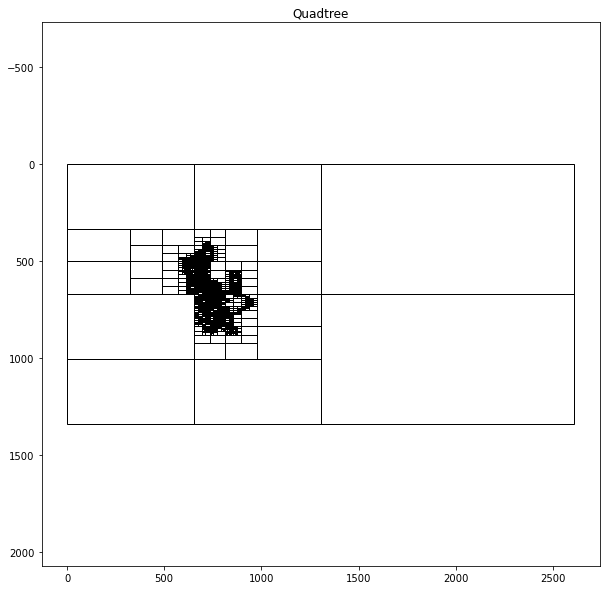

In [65]:
qtTemp = QTree(16, 1, img)  #contrast threshold, min cell size, img
qtTemp.subdivide() # recursively generates quad tree
qtTemp.graph_tree()

#qtTemp2 = QTree(9, 5, img) 
#qtTemp2.subdivide()
#qtTemp2.graph_tree()

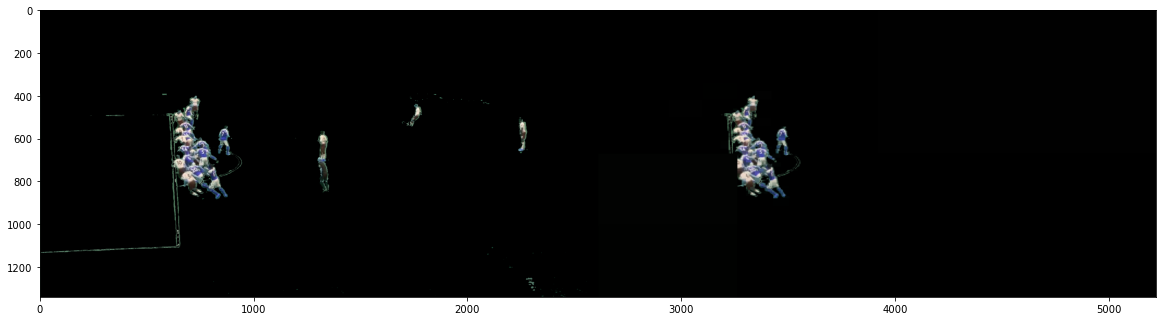

In [26]:
def displayQuadTree( threshold=7, minCell=3, img_boarder=20, line_boarder=1, line_color=(0,0,255)):
    imgT= masked_ #3
    qt = QTree(threshold, minCell, imgT) 
    qt.subdivide()
    qtImg= qt.render_img(thickness=line_boarder, color=line_color)
    #file_name = "output/" 
    #cv2.imwrite(file_name,qtImg)
    #file_name_2 = "output/diptych-" 
    hConcat,h = concat_images(imgT, qtImg, boarder=img_boarder, color=(255,255,255))
    #cv2.imwrite(file_name_2,hConcat)
    printI(hConcat)
    return h

h=displayQuadTree( threshold=16,  minCell=1, img_boarder=0, line_color=(0,255,0), line_boarder = 0) #3y1
#h=displayQuadTree( threshold=10,  minCell=1, img_boarder=0, line_color=(0,255,0), line_boarder = 0)#2y1

plt.figure(figsize=(20,15))
chico= h
chico_gray=  rgb2gray(chico)#1 podria omitirse este paso
thresh = threshold_otsu(chico_gray)
chico_otsu  = (chico_gray < 0.85) & (chico_gray > 0.23) #3
#chico_otsu  = (chico_gray < 0.99) & (chico_gray > 0.3)#2
#chico_otsu  = (chico_gray < 0.7) & (chico_gray > 0.1)#1
#ax[0].imshow(chico_otsu, cmap="gray")
filtered = masked_image(chico, chico_otsu)
plt.imshow(filtered)

# y si se combina

In [28]:
import cv2 as cv
#img_rojos = cv.cvtColor(cv.imread("file_name.png"), cv.COLOR_RGBA2RGB)
#img_rojos=filtered
img_rojos=h
img_rojos.shape

(1340, 2610, 3)

(-0.5, 2609.5, 1339.5, -0.5)

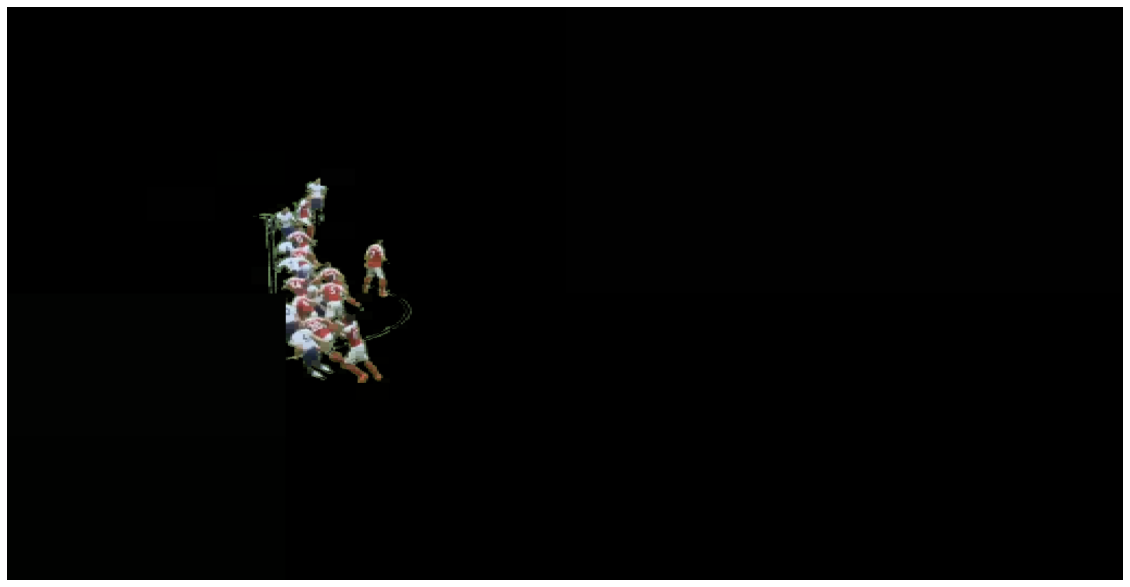

In [29]:

#hsv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots( figsize=(20,20)) 
#axarr.imshow(img)
axarr.imshow(img_rojos)
axarr.axis("off")

mejores resultados

(-0.5, 2609.5, 1339.5, -0.5)

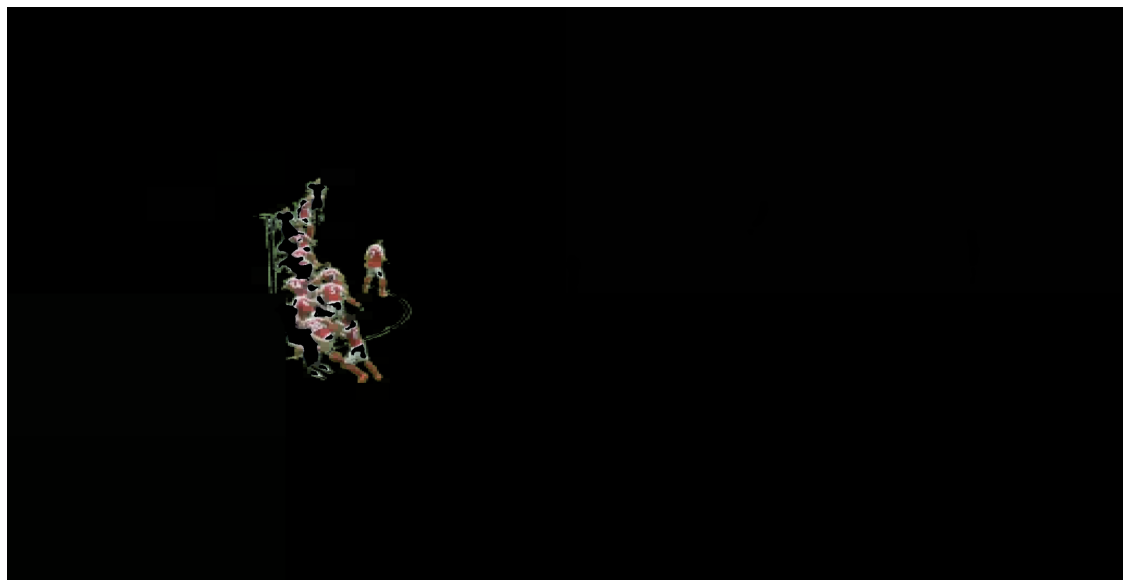

In [32]:

#hsv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots( figsize=(20,20)) 
#axarr.imshow(img)
dif=rgb2gray(img_rojos-blancos)
chico_otsu  = (dif > 0) 
filtered = masked_image(img_rojos, chico_otsu)
axarr.imshow(filtered)
axarr.axis("off")